<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Анализ" data-toc-modified-id="Анализ-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ</a></span><ul class="toc-item"><li><span><a href="#Скользящее-среднее" data-toc-modified-id="Скользящее-среднее-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Скользящее среднее</a></span></li><li><span><a href="#Тренды-и-сезонность" data-toc-modified-id="Тренды-и-сезонность-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Тренды и сезонность</a></span></li><li><span><a href="#Стационарные-ряды" data-toc-modified-id="Стационарные-ряды-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Стационарные ряды</a></span></li><li><span><a href="#Разности-временного-ряда" data-toc-modified-id="Разности-временного-ряда-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Разности временного ряда</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение</a></span></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

#  Прогнозирование заказов такси

Компания «Чётенькое такси» собрала исторические данные о заказах такси в аэропортах. Чтобы привлекать больше водителей в период пиковой нагрузки, нужно спрогнозировать количество заказов такси на следующий час. Постройте модель для такого предсказания.

Значение метрики *RMSE* на тестовой выборке должно быть не больше 48.

Вам нужно:

1. Загрузить данные и выполнить их ресемплирование по одному часу.
2. Проанализировать данные.
3. Обучить разные модели с различными гиперпараметрами. Сделать тестовую выборку размером 10% от исходных данных.
4. Проверить данные на тестовой выборке и сделать выводы.


Данные лежат в файле `taxi.csv`. Количество заказов находится в столбце `num_orders` (от англ. *number of orders*, «число заказов»).

In [11]:
import pandas as pd

from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

## Подготовка

In [2]:
try:
    data = pd.read_csv('taxi.csv', index_col='datetime', parse_dates=[0])
except:
    data = pd.read_csv('/datasets/taxi.csv', index_col='datetime', parse_dates=[0])

In [3]:
data.head()

,num_orders
datetime,
2018-03-01 00:00:00,9
2018-03-01 00:10:00,14
2018-03-01 00:20:00,28
2018-03-01 00:30:00,20
2018-03-01 00:40:00,32


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26496 entries, 2018-03-01 00:00:00 to 2018-08-31 23:50:00
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   num_orders  26496 non-null  int64
dtypes: int64(1)
memory usage: 414.0 KB


In [5]:
data.isna().sum()

num_orders    0
dtype: int64

In [6]:
data.sort_index(inplace=True)

In [7]:
data.resample('1D').sum()

,num_orders
datetime,
2018-03-01,1364
2018-03-02,1506
2018-03-03,1290
2018-03-04,1141
2018-03-05,1259
...,...
2018-08-27,3936
2018-08-28,3357
2018-08-29,3762


In [8]:
data_sample_hours = data.resample('1H').sum()

In [9]:
data_sample_hours.head()

,num_orders
datetime,
2018-03-01 00:00:00,124
2018-03-01 01:00:00,85
2018-03-01 02:00:00,71
2018-03-01 03:00:00,66
2018-03-01 04:00:00,43


## Анализ

### Скользящее среднее

<AxesSubplot:xlabel='datetime'>

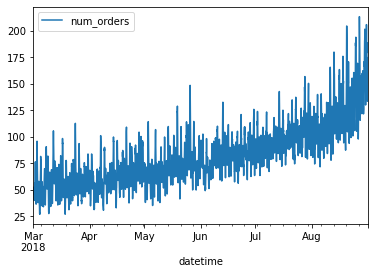

In [10]:
data_sample_hours.rolling(10).mean().plot()

### Тренды и сезонность

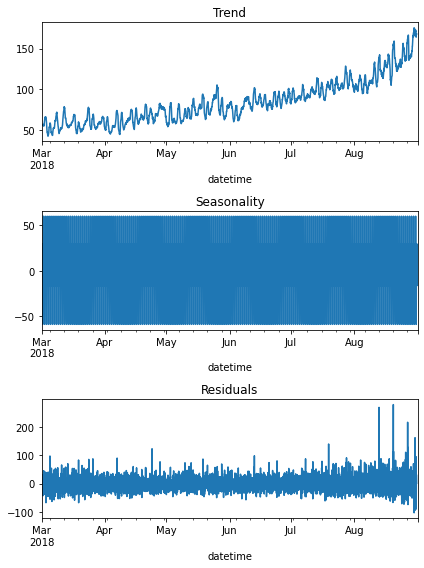

In [12]:
decomposed = seasonal_decompose(data_sample_hours)  # < напишите код здесь >

plt.figure(figsize=(6, 8))
plt.subplot(311)
# Чтобы график корректно отобразился, указываем его
# оси ax, равными plt.gca() (англ. get current axis,
# получить текущие оси)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca()) 
# < напишите код здесь >
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca()) 
# < напишите код здесь >
plt.title('Residuals')
plt.tight_layout()

Text(0.5, 1.0, 'Trend')

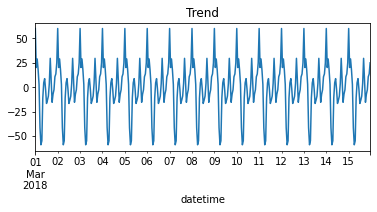

In [13]:
plt.figure(figsize=(6, 8))
plt.subplot(311)
# Чтобы график корректно отобразился, указываем его
# оси ax, равными plt.gca() (англ. get current axis,
# получить текущие оси)
decomposed.seasonal['2018-03-01' : '2018-03-15'].plot(ax=plt.gca())
plt.title('Trend')

### Стационарные ряды

In [ ]:
data = data - data.shift()
data['mean'] = data['PJME_MW'].rolling(15).mean()
data['std'] = data['PJME_MW'].rolling(15).std()
data.plot()

### Разности временного ряда

###

###

## Обучение

## Тестирование

## Чек-лист проверки

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Данные загружены и подготовлены
- [ ]  Данные проанализированы
- [ ]  Модель обучена, гиперпараметры подобраны
- [ ]  Качество моделей проверено, выводы сделаны
- [ ]  Значение *RMSE* на тестовой выборке не больше 48

In [15]:
import numpy as np

In [18]:
from sklearn.metrics import  mean_absolute_error

In [29]:
a = pd.Series(np.random.sample(10000))
b = pd.Series(np.random.sample(10000))

In [30]:
a.sample(10)

3837    0.930237
9450    0.043736
3861    0.850081
9281    0.959722
7295    0.628683
4782    0.562671
4970    0.521751
5796    0.844493
3736    0.141075
7469    0.258276
dtype: float64

In [31]:
li = []
state = np.random.RandomState(12345)
for i in range(1000):
    error = mean_absolute_error(a.sample(frac=10, replace=True,random_state=state),a.sample(frac=10, replace=True,random_state=state))
    li.append(error)

<AxesSubplot:>

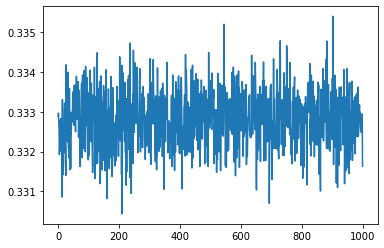

In [32]:
pd.Series(li).plot()